<a href="https://colab.research.google.com/github/teddcp/pandas-notes/blob/master/Time_Series_with_Pandas_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [2]:
data= pd.read_csv('/content/temp.csv')
data.head()

,datetime,LA,NY
0,2013-01-01 00:00:00,11.7,-1.1
1,2013-01-01 01:00:00,10.7,-1.7
2,2013-01-01 02:00:00,9.9,-2.0
3,2013-01-01 03:00:00,9.3,-2.1
4,2013-01-01 04:00:00,8.8,-2.3


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  35064 non-null  object 
 1   LA        35062 non-null  float64
 2   NY        35064 non-null  float64
dtypes: float64(2), object(1)
memory usage: 821.9+ KB


## Note

1. By default, read_csv wont read the date columns as datetime type.
  we can make it by passing **parse_dates** parameter.

2. optionally we can define a **parser**.

```
pd.read_csv('testresult.csv', parse_dates=['TIME'], 
    date_parser=lambda x: pd.to_datetime(x, format='%m/%d/%Y %I:%M:%S %p'))

```

3. We can convert a column to datetime column by ```pd.to_datetime```. [link-1](https://stackoverflow.com/q/26763344/12210002) [link-2](https://stackoverflow.com/a/25149272/12210002)
```
pd.to_datetime(raw_data['Mycol'], format='%d%b%Y:%H:%M:%S.%f')
```

# Reading from a csv file and making a column as datetime
------------------------------------------------------

In [5]:
data= pd.read_csv('/content/temp.csv',
                  parse_dates=['datetime'],
                  index_col='datetime')
data.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


# Slicing by date,year or month
---------------------------------------

1. Remember we must the set the datetime column as index to make the slicing more easy.

In [0]:
data['2015': '2017'].head()

,LA,NY
datetime,,
2015-01-01 00:00:00,3.8,-5.1
2015-01-01 01:00:00,4.4,-5.1
2015-01-01 02:00:00,3.2,-6.0
2015-01-01 03:00:00,1.2,-6.0
2015-01-01 04:00:00,0.2,-6.0


In [0]:
data['2015-12': '2016-12'].head()

,LA,NY
datetime,,
2015-12-01 00:00:00,18.6,5.8
2015-12-01 01:00:00,17.4,5.2
2015-12-01 02:00:00,15.5,5.1
2015-12-01 03:00:00,14.4,5.3
2015-12-01 04:00:00,12.6,5.3


In [0]:
data['2015-12-01 12': '2017-12-01 12'].head()

,LA,NY
datetime,,
2015-12-01 12:00:00,7.0,5.8
2015-12-01 13:00:00,6.9,6.4
2015-12-01 14:00:00,6.7,7.6
2015-12-01 15:00:00,6.8,7.8
2015-12-01 16:00:00,6.8,8.0


In [6]:
# If we try to pass the list of dates as index , it will generate an error
data.loc[['2015-12-01','2013 January 02']]

KeyError: ignored

In [8]:
# Solution
# Convert them to datetime object
# then it will work

my_dates=pd.to_datetime(['2015-12-01','2013 January 02'])
my_dates

DatetimeIndex(['2015-12-01', '2013-01-02'], dtype='datetime64[ns]', freq=None)

In [9]:
data.loc[my_dates]  # WORKS...

,LA,NY
2015-12-01,18.6,5.8
2013-01-02,13.2,2.6


# Converting a column to datetime column : pd.[to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)
-----------------------------------------------------------

In [0]:
data2=pd.read_csv('/content/temp.csv')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  35064 non-null  object 
 1   LA        35062 non-null  float64
 2   NY        35064 non-null  float64
dtypes: float64(2), object(1)
memory usage: 821.9+ KB


In [0]:
data2.head()

,datetime,LA,NY
0,2013-01-01 00:00:00,11.7,-1.1
1,2013-01-01 01:00:00,10.7,-1.7
2,2013-01-01 02:00:00,9.9,-2.0
3,2013-01-01 03:00:00,9.3,-2.1
4,2013-01-01 04:00:00,8.8,-2.3


In [0]:
pd.to_datetime(data2.datetime, format='%y-%m-%d', errors='ignore')

0        2013-01-01 00:00:00
1        2013-01-01 01:00:00
2        2013-01-01 02:00:00
3        2013-01-01 03:00:00
4        2013-01-01 04:00:00
                ...         
35059    2016-12-31 19:00:00
35060    2016-12-31 20:00:00
35061    2016-12-31 21:00:00
35062    2016-12-31 22:00:00
35063    2016-12-31 23:00:00
Name: datetime, Length: 35064, dtype: object

In [0]:
# Formatting as per our choice with dt.strftime 
new= pd.to_datetime(data2.datetime, errors='ignore')
#new.dtypes
new.dt.strftime('%d--%b--%Y %H:%M:%S')

0        01--Jan--2013 00:00:00
1        01--Jan--2013 01:00:00
2        01--Jan--2013 02:00:00
3        01--Jan--2013 03:00:00
4        01--Jan--2013 04:00:00
                  ...          
35059    31--Dec--2016 19:00:00
35060    31--Dec--2016 20:00:00
35061    31--Dec--2016 21:00:00
35062    31--Dec--2016 22:00:00
35063    31--Dec--2016 23:00:00
Name: datetime, Length: 35064, dtype: object

In [0]:
# Normalizing it : bringing all the dates to its mid-night hour
data.reset_index(inplace=True)

In [0]:
data.datetime.dt.normalize()

0       2013-01-01
1       2013-01-01
2       2013-01-01
3       2013-01-01
4       2013-01-01
           ...    
35059   2016-12-31
35060   2016-12-31
35061   2016-12-31
35062   2016-12-31
35063   2016-12-31
Name: datetime, Length: 35064, dtype: datetime64[ns]

In [0]:
# it assumes the format would be year-month-day
pd.to_datetime("20150520"), pd.to_datetime("2015 05 20"),pd.to_datetime("May 2015 20"),pd.to_datetime("2015 May 20")

(Timestamp('2015-05-20 00:00:00'),
 Timestamp('2015-05-20 00:00:00'),
 Timestamp('2015-05-20 00:00:00'),
 Timestamp('2015-05-20 00:00:00'))

In [0]:
pd.to_datetime("2015-20-05") # will create an error

ParserError: ignored

In [0]:
pd.to_datetime(["2015-05-20", "Feb 20 2015", "Elephant"], errors="coerce")

DatetimeIndex(['2015-05-20', '2015-02-20', 'NaT'], dtype='datetime64[ns]', freq=None)

In [0]:
pd.to_datetime(["2015-05-20", "Feb 20 2015", "Elephant"], errors="ignore")

Index(['2015-05-20', 'Feb 20 2015', 'Elephant'], dtype='object')

# Plotting with initial data
----------------------------------

In [0]:
data.set_index('datetime',inplace=True)

In [0]:
#data.drop(columns=['level_0','index'], inplace=True)
data.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef25a25668>,
      dtype=object)

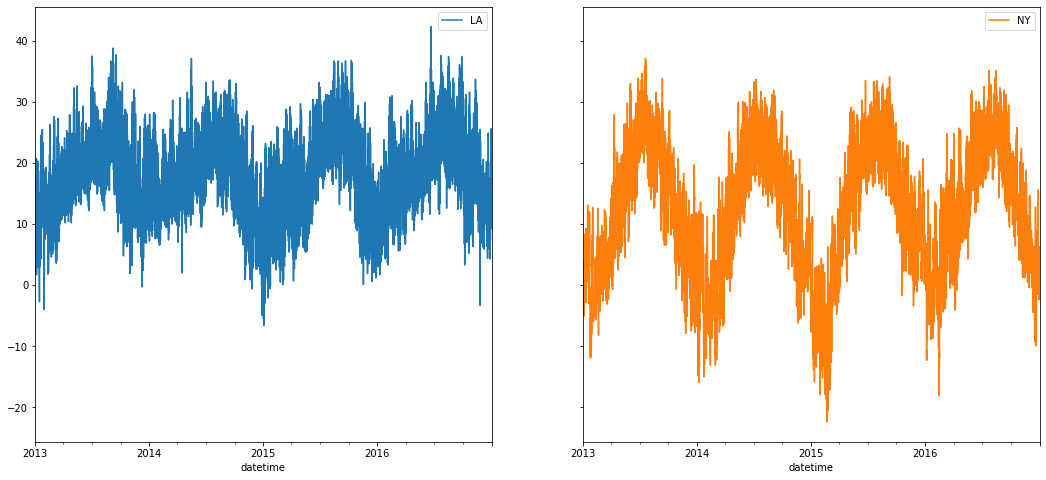

In [0]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(18,8))
data.plot(subplots=True,layout=(1,2), sharey=True,ax=ax)

In [0]:
new=pd.to_datetime(["2015-05-20 10:00:00", "2015-05-20 12:00:00"])
type(new[0])   # TimeStamp object

pandas._libs.tslibs.timestamps.Timestamp

In [0]:
new

DatetimeIndex(['2015-05-20 10:00:00', '2015-05-20 12:00:00'], dtype='datetime64[ns]', freq=None)

In [0]:
data.loc['2015':'2017']

,LA,NY
datetime,,
2015-01-01 00:00:00,3.8,-5.1
2015-01-01 01:00:00,4.4,-5.1
2015-01-01 02:00:00,3.2,-6.0
2015-01-01 03:00:00,1.2,-6.0
2015-01-01 04:00:00,0.2,-6.0
...,...,...
2016-12-31 19:00:00,13.5,4.6
2016-12-31 20:00:00,13.2,5.7
2016-12-31 21:00:00,12.8,5.8


In [0]:
data.loc['2015-02':'2017-02']

,LA,NY
datetime,,
2015-02-01 00:00:00,15.3,-6.4
2015-02-01 01:00:00,15.9,-6.4
2015-02-01 02:00:00,14.2,-7.7
2015-02-01 03:00:00,13.2,-7.7
2015-02-01 04:00:00,11.3,-7.7
...,...,...
2016-12-31 19:00:00,13.5,4.6
2016-12-31 20:00:00,13.2,5.7
2016-12-31 21:00:00,12.8,5.8


## With pd.date_range
----------------------------------------

In [10]:
pd.date_range(start='2015-01-01',end='2015-09-10',freq='D')

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2015-09-01', '2015-09-02', '2015-09-03', '2015-09-04',
               '2015-09-05', '2015-09-06', '2015-09-07', '2015-09-08',
               '2015-09-09', '2015-09-10'],
              dtype='datetime64[ns]', length=253, freq='D')

In [11]:
pd.date_range(end='2015-09-10',periods=31, freq='D')  # Periods

DatetimeIndex(['2015-08-11', '2015-08-12', '2015-08-13', '2015-08-14',
               '2015-08-15', '2015-08-16', '2015-08-17', '2015-08-18',
               '2015-08-19', '2015-08-20', '2015-08-21', '2015-08-22',
               '2015-08-23', '2015-08-24', '2015-08-25', '2015-08-26',
               '2015-08-27', '2015-08-28', '2015-08-29', '2015-08-30',
               '2015-08-31', '2015-09-01', '2015-09-02', '2015-09-03',
               '2015-09-04', '2015-09-05', '2015-09-06', '2015-09-07',
               '2015-09-08', '2015-09-09', '2015-09-10'],
              dtype='datetime64[ns]', freq='D')

In [12]:
pd.date_range(start='2015-01-01', periods=31,freq='B') # B means business days

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
               '2015-01-19', '2015-01-20', '2015-01-21', '2015-01-22',
               '2015-01-23', '2015-01-26', '2015-01-27', '2015-01-28',
               '2015-01-29', '2015-01-30', '2015-02-02', '2015-02-03',
               '2015-02-04', '2015-02-05', '2015-02-06', '2015-02-09',
               '2015-02-10', '2015-02-11', '2015-02-12'],
              dtype='datetime64[ns]', freq='B')

In [13]:
pd.date_range(start='2015-01-01', periods=3,freq='W') # W means weeks

# here freq='W-SUN' means it starts from sunday
# we can set it to our fav. day
# freq='w-wed' -> it will start from wednesday of every week

DatetimeIndex(['2015-01-04', '2015-01-11', '2015-01-18'], dtype='datetime64[ns]', freq='W-SUN')

In [15]:
pd.date_range(start='2015-01-01', periods=12, freq='H') # H means hourly

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 01:00:00',
               '2015-01-01 02:00:00', '2015-01-01 03:00:00',
               '2015-01-01 04:00:00', '2015-01-01 05:00:00',
               '2015-01-01 06:00:00', '2015-01-01 07:00:00',
               '2015-01-01 08:00:00', '2015-01-01 09:00:00',
               '2015-01-01 10:00:00', '2015-01-01 11:00:00'],
              dtype='datetime64[ns]', freq='H')

In [16]:
pd.date_range(start='2015-01-01', periods=4, freq='M') # M means Monthly

# by default it will show the month-end dates
# we can change it by assigning freq='MS' to start from Month Start

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30'], dtype='datetime64[ns]', freq='M')

In [20]:
pd.date_range(start='2015-01-01', periods=4, freq= pd.DateOffset(days=2)) # dateoffset to change on our will

# same
# pd.date_range(start='2015-01-01', periods=4, freq= '2D') # dateoffset to change on our will


DatetimeIndex(['2015-01-01', '2015-01-03', '2015-01-05', '2015-01-07'], dtype='datetime64[ns]', freq='<DateOffset: days=2>')

In [21]:
pd.date_range(start='2015-01-01', periods=4, freq= 'Q') # Quarter wise

DatetimeIndex(['2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31'], dtype='datetime64[ns]', freq='Q-DEC')

In [22]:
# To say explicitly: start from quarter start and from may
pd.date_range(start='2015-01-01', periods=4, freq= 'QS-may')

DatetimeIndex(['2015-02-01', '2015-05-01', '2015-08-01', '2015-11-01'], dtype='datetime64[ns]', freq='QS-MAY')

In [23]:
# Annually - 'A' # it will show the end dates
# AS -> start annually
# AS-may -> to start from particular month

pd.date_range(start='2015-01-01', periods=4, freq= 'AS-feb')

DatetimeIndex(['2015-02-01', '2016-02-01', '2017-02-01', '2018-02-01'], dtype='datetime64[ns]', freq='AS-FEB')

In [25]:
# Combinin gMultiple formats for frequency
pd.date_range(start='2015-01-01', periods=4, freq= '2D4H')  # will generate 4 periods of 2days and 4hours difference

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-03 04:00:00',
               '2015-01-05 08:00:00', '2015-01-07 12:00:00'],
              dtype='datetime64[ns]', freq='52H')

## Sampling
----------------------------------------------

1. DownSampling : high frequency to low frequency i.e *hourly data to daily/monthly/yearly*

In [26]:
data.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [27]:
data.resample('D')

In [29]:
# list(data.resample('D'))[2] # returns a tuple  where first element show the date and second contains the data  
list(data.resample('D'))[2][1]

,LA,NY
datetime,,
2013-01-03 00:00:00,15.1,0.3
2013-01-03 01:00:00,13.2,-0.2
2013-01-03 02:00:00,11.6,-1.0
2013-01-03 03:00:00,11.6,-2.0
2013-01-03 04:00:00,11.2,-2.7
2013-01-03 05:00:00,9.2,-3.7
2013-01-03 06:00:00,7.6,-4.4
2013-01-03 07:00:00,6.0,-5.1
2013-01-03 08:00:00,6.0,-5.1


In [30]:
data.resample('D').first() # first data of 24 hours i.e 00:00 hr's temperature on daily basis

# 2013-01-03	15.1	0.3

,LA,NY
datetime,,
2013-01-01,11.7,-1.1
2013-01-02,13.2,2.6
2013-01-03,15.1,0.3
2013-01-04,16.3,-1.2
2013-01-05,18.1,-1.2
...,...,...
2016-12-27,15.1,4.1
2016-12-28,19.9,11.2
2016-12-29,23.3,2.1


In [37]:
data.resample('D').last().head()  # last hour's temperature on daily basis

,LA,NY
datetime,,
2013-01-01,14.0,2.7
2013-01-02,15.1,1.2
2013-01-03,16.6,-1.5
2013-01-04,20.0,-1.2
2013-01-05,17.8,2.0


In [36]:
data.resample('2H').mean().head()

# median() or sum() can also be applied

,LA,NY
datetime,,
2013-01-01 00:00:00,11.20,-1.40
2013-01-01 02:00:00,9.60,-2.05
2013-01-01 04:00:00,8.75,-2.40
2013-01-01 06:00:00,7.35,-3.30
2013-01-01 08:00:00,6.65,-2.40


In [35]:
data.resample('W-wed').sum().head()

,LA,NY
datetime,,
2013-01-02,435.4,67.3
2013-01-09,1853.6,173.7
2013-01-16,1490.2,1008.2
2013-01-23,2466.0,169.8
2013-01-30,2109.2,-736.3


In [6]:
data.resample('MS').sum().head()

,LA,NY
datetime,,
2013-01-01,8627.6,840.4
2013-02-01,8458.6,415.2
2013-03-01,11181.9,2767.1
2013-04-01,11870.9,7703.5
2013-05-01,14140.3,11773.3


In [8]:
data.resample('MS',loffset='14D' ).sum().head()

,LA,NY
datetime,,
2013-01-15,8627.6,840.4
2013-02-15,8458.6,415.2
2013-03-15,11181.9,2767.1
2013-04-15,11870.9,7703.5
2013-05-15,14140.3,11773.3


In [11]:
data.resample('MS',loffset='14D' ).sum().head()

# loffset adjusts the label of datetime index
# values are still same
# only index chnages

,LA,NY
datetime,,
2013-01-15,8627.6,840.4
2013-02-15,8458.6,415.2
2013-03-15,11181.9,2767.1
2013-04-15,11870.9,7703.5
2013-05-15,14140.3,11773.3


In [12]:
data.resample('YS' ).sum().head()  # Year wise

,LA,NY
datetime,,
2013-01-01,150411.9,106838.3
2014-01-01,151071.6,99609.6
2015-01-01,150597.8,103325.9
2016-01-01,161013.4,113388.0


In [13]:
data.resample('QS').sum().head() # Quarter wise

,LA,NY
datetime,,
2013-01-01,28268.1,4022.7
2013-04-01,40343.1,35479.3
2013-07-01,48575.2,49484.8
2013-10-01,33225.5,17851.5
2014-01-01,33497.9,-1233.1


In [15]:
# Till now we are getting detailed timestamps for index irrespective of sampling
# lets say we are sampling with week(W), then our index should show the relevant dates for the index column
# for annual sampling we are only intrested in year, so it should display the year only, not whole timestamps
# similarly for months, it should display the month only

# kind='timestamp' -> generates the whole detailed timestamp

data.resample('Y', kind='period' ).sum().head() # Only year

,LA,NY
datetime,,
2013,150411.9,106838.3
2014,151071.6,99609.6
2015,150597.8,103325.9
2016,161013.4,113388.0


In [16]:
data.resample('M', kind='period' ).sum().head() 

,LA,NY
datetime,,
2013-01,8627.6,840.4
2013-02,8458.6,415.2
2013-03,11181.9,2767.1
2013-04,11870.9,7703.5
2013-05,14140.3,11773.3


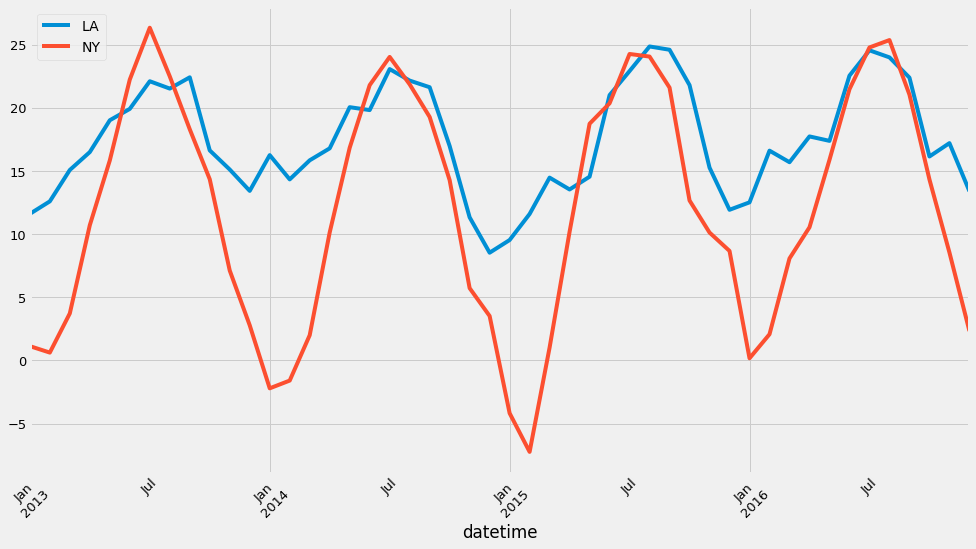

In [20]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

new = data.resample('M', kind='period' ).mean()
new.plot( figsize=(15,8),rot=45,fontsize=13)

# With periodIndex
-------------------------------------



In [21]:
data.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [22]:
data.loc['2013-02':'2013-03']

,LA,NY
datetime,,
2013-02-01 00:00:00,16.5,12.0
2013-02-01 01:00:00,16.4,12.0
2013-02-01 02:00:00,14.4,12.0
2013-02-01 03:00:00,14.1,10.0
2013-02-01 04:00:00,12.9,10.0
...,...,...
2013-03-31 19:00:00,18.1,14.0
2013-03-31 20:00:00,19.5,14.2
2013-03-31 21:00:00,20.8,14.1


In [23]:
data.loc['2015']  # WORKs...............

,LA,NY
datetime,,
2015-01-01 00:00:00,3.8,-5.1
2015-01-01 01:00:00,4.4,-5.1
2015-01-01 02:00:00,3.2,-6.0
2015-01-01 03:00:00,1.2,-6.0
2015-01-01 04:00:00,0.2,-6.0
...,...,...
2015-12-31 19:00:00,16.0,8.1
2015-12-31 20:00:00,16.0,8.1
2015-12-31 21:00:00,16.4,7.9


In [24]:
# Now converting to periodIndex
new.head()

,LA,NY
datetime,,
2013-01,11.596237,1.129570
2013-02,12.587202,0.617857
2013-03,15.069946,3.719220
2013-04,16.487361,10.699306
2013-05,19.005780,15.824328


In [25]:
new.loc['2013-02':'2013-03'] # Still Works

,LA,NY
datetime,,
2013-02,12.587202,0.617857
2013-03,15.069946,3.719220


In [27]:
new.loc['2015']  # won't work

# Only first month appears

LA    9.527016
NY   -4.179301
Name: 2015-01, dtype: float64

In [30]:
# Converting back to timstamps
new.to_timestamp(how='start',freq='D').head()

,LA,NY
datetime,,
2013-01-01,11.596237,1.129570
2013-02-01,12.587202,0.617857
2013-03-01,15.069946,3.719220
2013-04-01,16.487361,10.699306
2013-05-01,19.005780,15.824328


## Reindexing
-----------------------------------------------------

In [41]:
new= pd.date_range(start='2010-02-05',periods=10,freq='Y')
new

DatetimeIndex(['2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31', '2016-12-31', '2017-12-31',
               '2018-12-31', '2019-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [42]:
data.loc[new] # it does not work for missing data

KeyError: ignored

In [43]:
data.reindex(index=new)

,LA,NY
2010-12-31,NaN,NaN
2011-12-31,NaN,NaN
2012-12-31,NaN,NaN
2013-12-31,20.7,-1.8
2014-12-31,7.2,-4.8
2015-12-31,15.1,6.6
2016-12-31,15.7,0.8
2017-12-31,NaN,NaN
2018-12-31,NaN,NaN
2019-12-31,NaN,NaN


In [45]:
data.reindex(index=new, method='bfill')

# method = 'nearest' or 'bfill'

,LA,NY
2010-12-31,11.7,-1.1
2011-12-31,11.7,-1.1
2012-12-31,11.7,-1.1
2013-12-31,20.7,-1.8
2014-12-31,7.2,-4.8
2015-12-31,15.1,6.6
2016-12-31,15.7,0.8
2017-12-31,NaN,NaN
2018-12-31,NaN,NaN
2019-12-31,NaN,NaN
